In [ ]:
import polars as pl
import pandas as pd
import numpy as np
import statsmodels.graphics.api as smg
from pandas.plotting import scatter_matrix
import pycaret

In [2]:
data = pd.read_csv("HM interview data 2024-09.csv")

In [5]:
data.head(5).round(2)

,Age,Gender,House_size,State,Time,Y_Actual,state_impact,spend,Y_RN,time_in_hours
0,57,1,596,FL,17:32.8,0,1,0.17,0.90,17.55
1,49,0,936,CA,02:12.5,0,5,0.18,0.54,2.21
2,58,1,1209,NY,16:37.8,0,5,0.34,0.88,16.63
3,43,0,2561,TX,18:48.9,0,1,0.67,0.80,18.82
4,55,0,1289,IL,47:56.4,0,1,0.38,0.68,47.94


In [4]:
# Function to convert time string to hours
def time_to_hours(time_str):
    hours, minutes = map(float, time_str.split(':'))
    total_hours = hours + minutes / 60
    return total_hours

# Apply the function to the Time column
data['time_in_hours'] = data['Time'].apply(time_to_hours)

In [6]:
data.describe().round(2)

,Age,Gender,House_size,Y_Actual,state_impact,spend,Y_RN,time_in_hours
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,50.02,0.49,1701.77,0.25,2.85,0.50,0.49,29.84
std,6.06,0.50,746.07,0.43,1.99,0.29,0.29,17.47
min,40.00,0.00,400.00,0.00,1.00,0.00,0.00,0.00
25%,45.00,0.00,1060.75,0.00,1.00,0.25,0.24,14.73
50%,50.00,0.00,1697.50,0.00,1.00,0.50,0.49,29.78
75%,55.00,1.00,2346.00,1.00,5.00,0.75,0.74,44.97
max,60.00,1.00,2999.00,1.00,5.00,1.00,1.00,60.00


In [7]:
data.groupby("Gender").describe().round(2)

Age                                            House_size           \
         count   mean   std   min   25%   50%   75%   max      count     mean   
Gender                                                                          
0       5076.0  50.13  6.05  40.0  45.0  50.0  55.0  60.0     5076.0  1693.01   
1       4924.0  49.91  6.07  40.0  45.0  50.0  55.0  60.0     4924.0  1710.81   

        ...  Y_RN      time_in_hours                                           \
        ...   75%  max         count   mean    std   min    25%    50%    75%   
Gender  ...                                                                     
0       ...  0.73  1.0        5076.0  29.62  17.47  0.00  14.37  29.34  44.72   
1       ...  0.74  1.0        4924.0  30.08  17.46  0.03  15.18  30.09  45.27   

               
          max  
Gender         
0       60.00  
1       59.98  

[2 rows x 56 columns]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'House_size'}>],
       [<Axes: title={'center': 'Y_Actual'}>,
        <Axes: title={'center': 'state_impact'}>,
        <Axes: title={'center': 'spend'}>],
       [<Axes: title={'center': 'Y_RN'}>,
        <Axes: title={'center': 'time_in_hours'}>,
        <Axes: title={'center': 'Y_Rule'}>]], dtype=object)

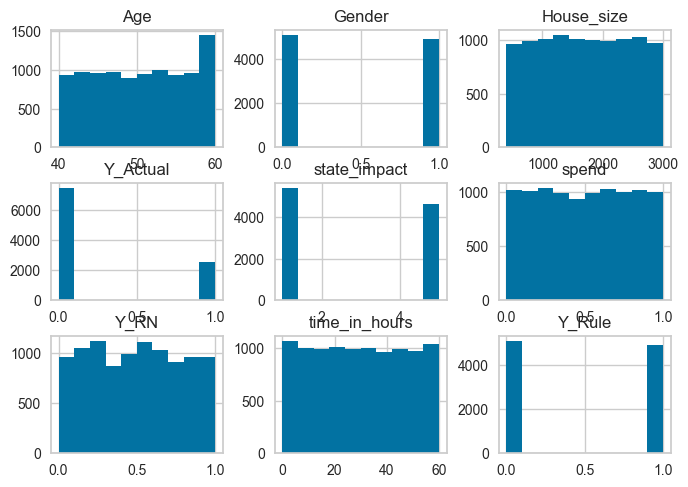

In [113]:
data.hist()

Y_Actual
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

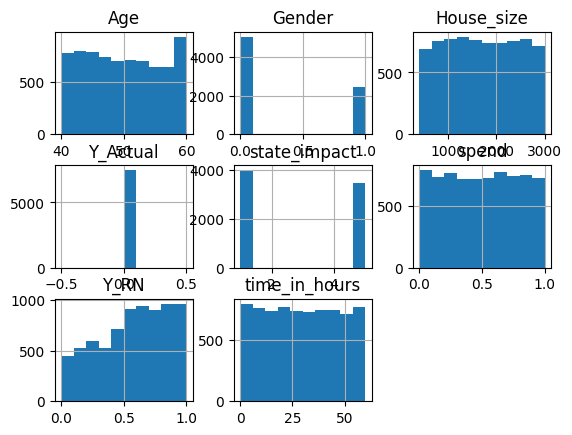

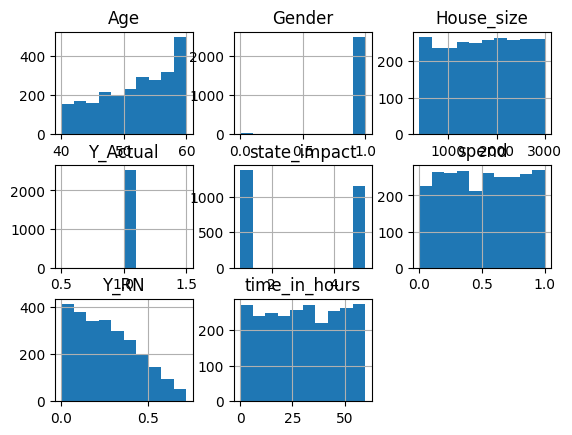

In [9]:
data.groupby('Y_Actual').hist()

In [10]:
data_y = data.groupby('Y_Actual').describe()

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Gender', ylabel='Age'>,
        <Axes: xlabel='House_size', ylabel='Age'>,
        <Axes: xlabel='Y_Actual', ylabel='Age'>,
        <Axes: xlabel='state_impact', ylabel='Age'>,
        <Axes: xlabel='spend', ylabel='Age'>,
        <Axes: xlabel='Y_RN', ylabel='Age'>,
        <Axes: xlabel='time_in_hours', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='House_size', ylabel='Gender'>,
        <Axes: xlabel='Y_Actual', ylabel='Gender'>,
        <Axes: xlabel='state_impact', ylabel='Gender'>,
        <Axes: xlabel='spend', ylabel='Gender'>,
        <Axes: xlabel='Y_RN', ylabel='Gender'>,
        <Axes: xlabel='time_in_hours', ylabel='Gender'>],
       [<Axes: xlabel='Age', ylabel='House_size'>,
        <Axes: xlabel='Gender', ylabel='House_size'>,
        <Axes: xlabel='House_size', ylabel='House_size'>,
        <Axes: xlabel='Y_Actual',

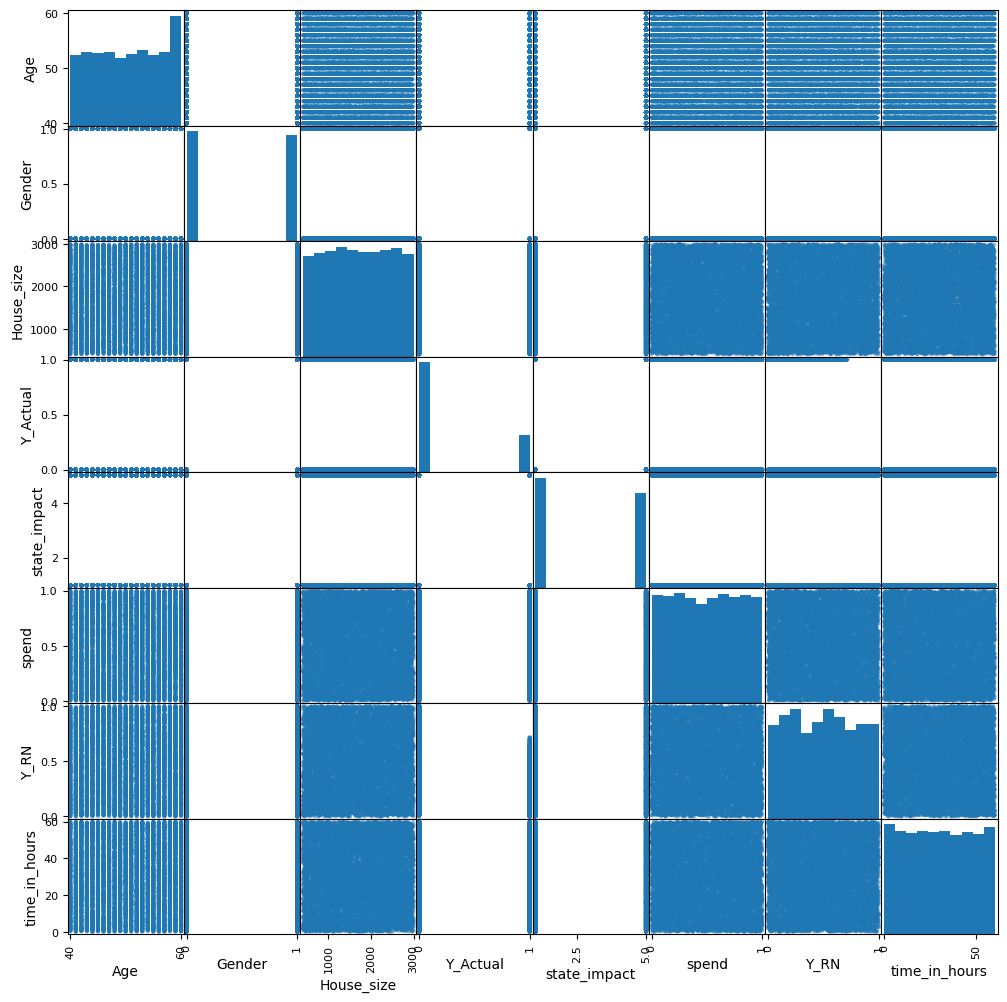

In [11]:
scatter_matrix(data, alpha=0.5, figsize=(12, 12), diagonal='hist')

In [12]:
age_60 = data[data['Age'] == 60]

In [13]:
age_60.describe()

,Age,Gender,House_size,Y_Actual,state_impact,spend,Y_RN,time_in_hours
count,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,60.0,0.477516,1715.854390,0.379015,2.884368,0.494948,0.477537,29.932869
std,0.0,0.500030,761.729056,0.485662,1.998796,0.292538,0.282125,17.402074
min,60.0,0.000000,414.000000,0.000000,1.000000,0.000206,0.000000,0.101667
25%,60.0,0.000000,1112.500000,0.000000,1.000000,0.232195,0.230000,14.228333
50%,60.0,0.000000,1707.000000,0.000000,1.000000,0.499511,0.470000,30.013333
75%,60.0,1.000000,2395.500000,1.000000,5.000000,0.766725,0.710000,44.734167
max,60.0,1.000000,2999.000000,1.000000,5.000000,0.996282,1.000000,59.995000


In [14]:
numeric_data = data[['Age', 'Gender', 'House_size', 'time_in_hours', 'state_impact', 'spend', 'Y_RN', 'Y_Actual']]

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

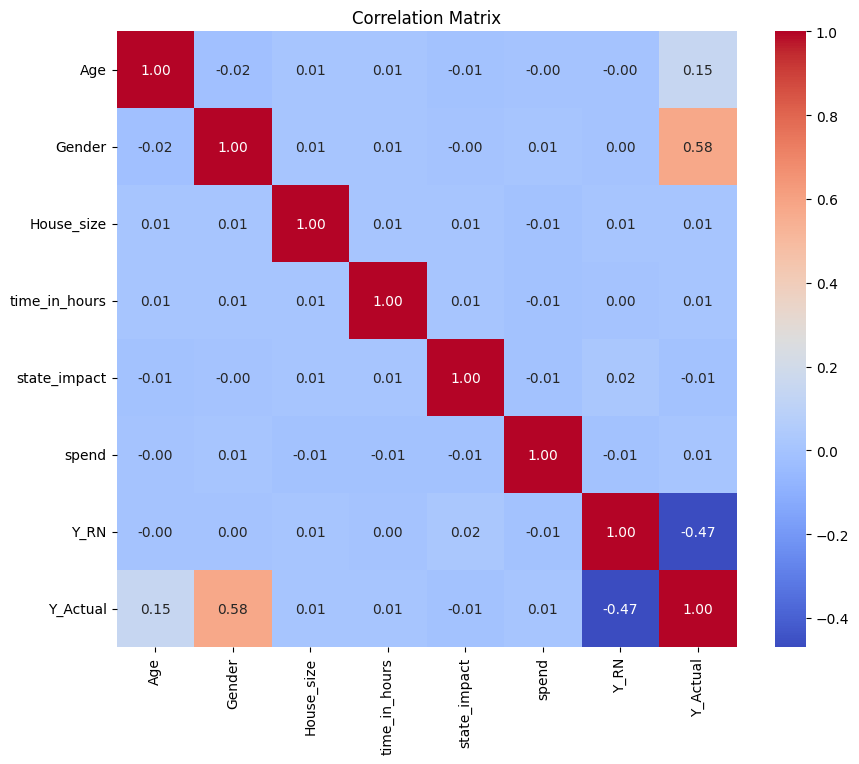

In [16]:
correlation_matrix = numeric_data.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
from statsmodels.stats.descriptivestats import describe

In [18]:
describe(data).round(2)

,Age,Gender,House_size,Y_Actual,state_impact,spend,Y_RN,time_in_hours
nobs,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
missing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,50.02,0.49,1701.77,0.25,2.85,0.50,0.49,29.84
std_err,0.06,0.00,7.46,0.00,0.02,0.00,0.00,0.17
upper_ci,50.14,0.50,1716.39,0.26,2.89,0.50,0.50,30.19
lower_ci,49.90,0.48,1687.15,0.24,2.81,0.49,0.49,29.50
std,6.06,0.50,746.07,0.43,1.99,0.29,0.29,17.47
iqr,10.00,1.00,1285.25,1.00,4.00,0.51,0.50,30.24
iqr_normal,7.41,0.74,952.76,0.74,2.97,0.37,0.37,22.42
mad,5.25,0.50,646.09,0.38,1.99,0.25,0.25,15.13


In [19]:
numeric_data.corr()["Y_Actual"]

Age              0.150374
Gender           0.575685
House_size       0.005640
time_in_hours    0.009834
state_impact    -0.007268
spend            0.013977
Y_RN            -0.466030
Y_Actual         1.000000
Name: Y_Actual, dtype: float64

In [20]:
import scipy.stats as stats

In [21]:
# Step 2: T-test for each predictor variable (binary Y_Actual groups)
t_test_results = {}
for col in numeric_data.columns:
    if col != "Y_Actual":
        group_0 = numeric_data[numeric_data["Y_Actual"] == 0][col]
        group_1 = numeric_data[numeric_data["Y_Actual"] == 1][col]
        t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
        t_test_results[col] = {"T-statistic": t_stat, "P-value": p_value}


In [22]:
t_test_df = pd.DataFrame(t_test_results).T

In [23]:
t_test_df = t_test_df.round(3)
t_test_df

,T-statistic,P-value
Age,-15.349,0.000
Gender,-113.068,0.000
House_size,-0.559,0.576
time_in_hours,-0.980,0.327
state_impact,0.727,0.467
spend,-1.396,0.163
Y_RN,64.931,0.000


In [24]:
import plotly.express as px

fig = px.histogram(data, x='State', color='Y_Actual', barmode='group', title='Histogram of Y_Actual vs State')
fig.show()

In [25]:
counting_df = data.groupby(['State', 'Y_Actual']).size().reset_index(name='counts')
print(counting_df)

  State  Y_Actual  counts
0    CA         0    2319
1    CA         1     789
2    FL         0    1370
3    FL         1     498
4    IL         0     868
5    IL         1     288
6    NY         0    1156
7    NY         1     365
8    TX         0    1760
9    TX         1     587


In [26]:
# Calculate the total counts per state
total_counts_per_state = counting_df.groupby('State')['counts'].sum().reset_index(name='total_counts')

# Merge the total counts with the counting_df
counting_df = counting_df.merge(total_counts_per_state, on='State')

# Calculate the proportion
counting_df['proportion'] = counting_df['counts'] / counting_df['total_counts']



In [27]:
data_pl = pl.DataFrame(data)

In [28]:
pl.Config.set_tbl_rows(10)
pl.Config.set_tbl_cols(10)
print(data_pl)

shape: (10_000, 10)
┌─────┬────────┬────────────┬───────┬─────────┬──────────┬───────────┬──────────┬──────┬───────────┐
│ Age ┆ Gender ┆ House_size ┆ State ┆ Time    ┆ Y_Actual ┆ state_imp ┆ spend    ┆ Y_RN ┆ time_in_h │
│ --- ┆ ---    ┆ ---        ┆ ---   ┆ ---     ┆ ---      ┆ act       ┆ ---      ┆ ---  ┆ ours      │
│ i64 ┆ i64    ┆ i64        ┆ str   ┆ str     ┆ i64      ┆ ---       ┆ f64      ┆ f64  ┆ ---       │
│     ┆        ┆            ┆       ┆         ┆          ┆ i64       ┆          ┆      ┆ f64       │
╞═════╪════════╪════════════╪═══════╪═════════╪══════════╪═══════════╪══════════╪══════╪═══════════╡
│ 57  ┆ 1      ┆ 596        ┆ FL    ┆ 17:32.8 ┆ 0        ┆ 1         ┆ 0.171434 ┆ 0.9  ┆ 17.546667 │
│ 49  ┆ 0      ┆ 936        ┆ CA    ┆ 02:12.5 ┆ 0        ┆ 5         ┆ 0.175827 ┆ 0.54 ┆ 2.208333  │
│ 58  ┆ 1      ┆ 1209       ┆ NY    ┆ 16:37.8 ┆ 0        ┆ 5         ┆ 0.34441  ┆ 0.88 ┆ 16.63     │
│ 43  ┆ 0      ┆ 2561       ┆ TX    ┆ 18:48.9 ┆ 0        ┆ 1         ┆ 

In [29]:
data_pl_gender = data_pl.filter(
    (pl.col("Y_Actual") == 1) & (pl.col("Gender") == 0)
)

In [30]:
data_pl_stat = data_pl.describe()
data_pl_gender_stat = data_pl_gender.describe()
print(data_pl_stat)

shape: (9, 11)
┌─────────┬─────────┬─────────┬─────────┬───────┬───┬─────────┬─────────┬────────┬────────┬────────┐
│ statist ┆ Age     ┆ Gender  ┆ House_s ┆ State ┆ … ┆ Y_Actua ┆ state_i ┆ spend  ┆ Y_RN   ┆ time_i │
│ ic      ┆ ---     ┆ ---     ┆ ize     ┆ ---   ┆   ┆ l       ┆ mpact   ┆ ---    ┆ ---    ┆ n_hour │
│ ---     ┆ f64     ┆ f64     ┆ ---     ┆ str   ┆   ┆ ---     ┆ ---     ┆ f64    ┆ f64    ┆ s      │
│ str     ┆         ┆         ┆ f64     ┆       ┆   ┆ f64     ┆ f64     ┆        ┆        ┆ ---    │
│         ┆         ┆         ┆         ┆       ┆   ┆         ┆         ┆        ┆        ┆ f64    │
╞═════════╪═════════╪═════════╪═════════╪═══════╪═══╪═════════╪═════════╪════════╪════════╪════════╡
│ count   ┆ 10000.0 ┆ 10000.0 ┆ 10000.0 ┆ 10000 ┆ … ┆ 10000.0 ┆ 10000.0 ┆ 10000. ┆ 10000. ┆ 10000. │
│         ┆         ┆         ┆         ┆       ┆   ┆         ┆         ┆ 0      ┆ 0      ┆ 0      │
│ null_co ┆ 0.0     ┆ 0.0     ┆ 0.0     ┆ 0     ┆ … ┆ 0.0     ┆ 0.0     ┆ 0.

In [31]:
# Get the names of numeric columns (all columns except the first)
data_pl_num = data_pl.select(pl.col("*").exclude("Time", "State"))
numeric_cols = data_pl_num.columns

In [32]:
dif_num =  data_pl_stat.select(numeric_cols) - data_pl_gender_stat.select(numeric_cols)
result = pl.concat([data_pl_stat.select("statistic"), dif_num], how="horizontal")
print(result)

shape: (9, 9)
┌──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┐
│ statisti ┆ Age      ┆ Gender   ┆ House_si ┆ Y_Actual ┆ state_im ┆ spend    ┆ Y_RN     ┆ time_in_ │
│ c        ┆ ---      ┆ ---      ┆ ze       ┆ ---      ┆ pact     ┆ ---      ┆ ---      ┆ hours    │
│ ---      ┆ f64      ┆ f64      ┆ ---      ┆ f64      ┆ ---      ┆ f64      ┆ f64      ┆ ---      │
│ str      ┆          ┆          ┆ f64      ┆          ┆ f64      ┆          ┆          ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ count    ┆ 9968.0   ┆ 9968.0   ┆ 9968.0   ┆ 9968.0   ┆ 9968.0   ┆ 9968.0   ┆ 9968.0   ┆ 9968.0   │
│ null_cou ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ nt       ┆          ┆          ┆          ┆          ┆          ┆          ┆          ┆          │
│ mean     ┆ -4.32085 ┆ 0.4924   ┆ -60.9176 ┆ -0.7473  ┆ -0.3984  ┆ -0.03652 

In [33]:
state_gender = data_pl_gender.group_by("State").agg(pl.count("State").alias("count")).sort("count")
state_gender_count = state_gender.with_columns(pl.sum("count").alias("total_count"))
state_gender_count = state_gender_count.with_columns((pl.col("count") / pl.col("total_count")).alias("proportion"))
print(state_gender_count)

shape: (5, 4)
┌───────┬───────┬─────────────┬────────────┐
│ State ┆ count ┆ total_count ┆ proportion │
│ ---   ┆ ---   ┆ ---         ┆ ---        │
│ str   ┆ u32   ┆ u32         ┆ f64        │
╞═══════╪═══════╪═════════════╪════════════╡
│ IL    ┆ 3     ┆ 32          ┆ 0.09375    │
│ TX    ┆ 3     ┆ 32          ┆ 0.09375    │
│ NY    ┆ 4     ┆ 32          ┆ 0.125      │
│ FL    ┆ 8     ┆ 32          ┆ 0.25       │
│ CA    ┆ 14    ┆ 32          ┆ 0.4375     │
└───────┴───────┴─────────────┴────────────┘


In [34]:
state_gender_all = data_pl.group_by("State").agg(pl.count("State").alias("count")).sort("count")
state_gender_count_all = state_gender_all.with_columns(pl.sum("count").alias("total_count"))
state_gender_count_all = state_gender_count_all.with_columns((pl.col("count") / pl.col("total_count")).alias("proportion"))
print(state_gender_count_all)

shape: (5, 4)
┌───────┬───────┬─────────────┬────────────┐
│ State ┆ count ┆ total_count ┆ proportion │
│ ---   ┆ ---   ┆ ---         ┆ ---        │
│ str   ┆ u32   ┆ u32         ┆ f64        │
╞═══════╪═══════╪═════════════╪════════════╡
│ IL    ┆ 1156  ┆ 10000       ┆ 0.1156     │
│ NY    ┆ 1521  ┆ 10000       ┆ 0.1521     │
│ FL    ┆ 1868  ┆ 10000       ┆ 0.1868     │
│ TX    ┆ 2347  ┆ 10000       ┆ 0.2347     │
│ CA    ┆ 3108  ┆ 10000       ┆ 0.3108     │
└───────┴───────┴─────────────┴────────────┘


In [35]:
# Set to a high number to ensure all columns are shown
pl.Config.set_tbl_cols(1000)
print(data_pl_gender.describe())

shape: (9, 11)
┌─────────┬────────┬────────┬────────┬───────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ statist ┆ Age    ┆ Gender ┆ House_ ┆ State ┆ Time   ┆ Y_Actu ┆ state_ ┆ spend  ┆ Y_RN   ┆ time_i │
│ ic      ┆ ---    ┆ ---    ┆ size   ┆ ---   ┆ ---    ┆ al     ┆ impact ┆ ---    ┆ ---    ┆ n_hour │
│ ---     ┆ f64    ┆ f64    ┆ ---    ┆ str   ┆ str    ┆ ---    ┆ ---    ┆ f64    ┆ f64    ┆ s      │
│ str     ┆        ┆        ┆ f64    ┆       ┆        ┆ f64    ┆ f64    ┆        ┆        ┆ ---    │
│         ┆        ┆        ┆        ┆       ┆        ┆        ┆        ┆        ┆        ┆ f64    │
╞═════════╪════════╪════════╪════════╪═══════╪════════╪════════╪════════╪════════╪════════╪════════╡
│ count   ┆ 32.0   ┆ 32.0   ┆ 32.0   ┆ 32    ┆ 32     ┆ 32.0   ┆ 32.0   ┆ 32.0   ┆ 32.0   ┆ 32.0   │
│ null_co ┆ 0.0    ┆ 0.0    ┆ 0.0    ┆ 0     ┆ 0      ┆ 0.0    ┆ 0.0    ┆ 0.0    ┆ 0.0    ┆ 0.0    │
│ unt     ┆        ┆        ┆        ┆       ┆        ┆        ┆        ┆   

In [36]:
import statsmodels.formula.api as smf

In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=123)


In [38]:
model = smf.logit("Y_Actual ~ Age + Gender + House_size + State + state_impact + spend + time_in_hours",
                  data = train).fit()

Optimization terminated successfully.
         Current function value: 0.344103
         Iterations 9


In [39]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Y_Actual   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Sun, 02 Mar 2025   Pseudo R-squ.:                  0.3916
Time:                        17:25:11   Log-Likelihood:                -2752.8
converged:                       True   LL-Null:                       -4524.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.5508   2.19e+06  -2.99e-06      1.000   -4.29e+06    4.29e+06
State[T.FL]      -2.6958   1.75e+06  -1.54e-06      1.000   -3.43e+06    3.43e+06
State[T.IL]      -2.6523   1.75e+06  -1.

In [40]:
# Get log odds from the model
log_odds = pd.DataFrame({
    'Variable': model.params.index,
    'Log_Odds': model.params.values,
    'P_value': model.pvalues
}).round(4)

print("Log Odds Ratios:")
print(log_odds)

Log Odds Ratios:
                    Variable  Log_Odds  P_value
Intercept          Intercept   -6.5508   1.0000
State[T.FL]      State[T.FL]   -2.6958   1.0000
State[T.IL]      State[T.IL]   -2.6523   1.0000
State[T.NY]      State[T.NY]   -0.1237   0.2271
State[T.TX]      State[T.TX]   -2.6749   1.0000
Age                      Age    0.0929   0.0000
Gender                Gender    5.2010   0.0000
House_size        House_size   -0.0000   0.9095
state_impact    state_impact   -0.6617   1.0000
spend                  spend    0.0880   0.4324
time_in_hours  time_in_hours    0.0015   0.4210


In [41]:
# Group by 'Y_Actual' and 'Gender' and calculate the size
grouped_data = data.groupby(['Y_Actual', 'Gender']).size().reset_index(name='counts')

# Calculate the total counts per 'Y_Actual'
total_counts_per_class = grouped_data.groupby('Y_Actual')['counts'].sum().reset_index(name='total_counts')

# Merge the total counts with the grouped_data
grouped_data = grouped_data.merge(total_counts_per_class, on='Y_Actual')

# Calculate the proportion
grouped_data['proportion'] = grouped_data['counts'] / grouped_data['total_counts']

print(grouped_data)

   Y_Actual  Gender  counts  total_counts  proportion
0         0       0    5044          7473    0.674963
1         0       1    2429          7473    0.325037
2         1       0      32          2527    0.012663
3         1       1    2495          2527    0.987337


In [42]:
data['Y_Rule'] = data['Gender'].apply(lambda x: 0 if x == 0 else 1)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

          Predicted 0  Predicted 1
Actual 0         5044         2429
Actual 1           32         2495

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      7473
           1       0.51      0.99      0.67      2527

    accuracy                           0.75     10000
   macro avg       0.75      0.83      0.74     10000
weighted avg       0.87      0.75      0.77     10000

Accuracy: 0.754
Precision: 0.507
Recall: 0.987
F1 Score: 0.67
AUC: 0.831


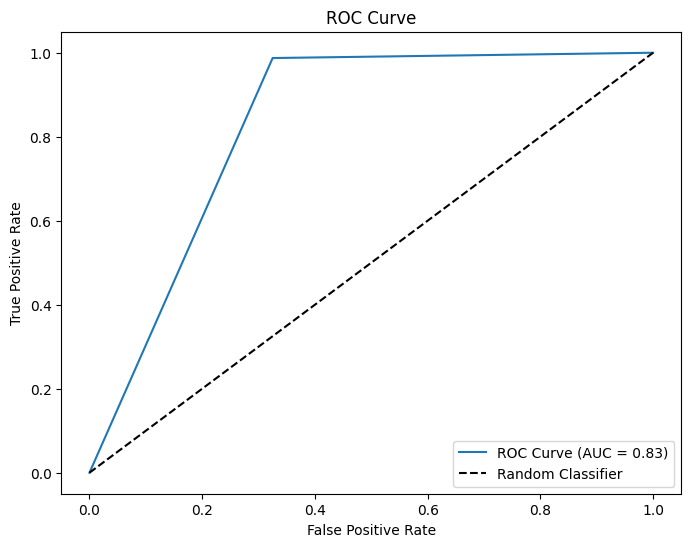

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_performance(data, y_actual_col, y_pred_col):
    # Create confusion matrix
    y_true = data[y_actual_col]
    y_pred = data[y_pred_col]
    cm = confusion_matrix(y_true, y_pred)

    # Display confusion matrix
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    print(cm_df)

    # Get a full classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Alternatively, compute metrics individually:
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print("Accuracy:", round(acc, 3))
    print("Precision:", round(prec, 3))
    print("Recall:", round(rec, 3))
    print("F1 Score:", round(f1, 3))
    print("AUC:", round(auc, 3))
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    # Calculate the AUC score
    auc_score = roc_auc_score(y_true, y_pred)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Example usage
evaluate_model_performance(data, 'Y_Actual', 'Y_Rule')

In [45]:
train['Y_Logit_Pred'] = model.predict(train) > 0.5

          Predicted 0  Predicted 1
Actual 0         5201          775
Actual 1          769         1255

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5976
           1       0.62      0.62      0.62      2024

    accuracy                           0.81      8000
   macro avg       0.74      0.75      0.74      8000
weighted avg       0.81      0.81      0.81      8000

Accuracy: 0.807
Precision: 0.618
Recall: 0.62
F1 Score: 0.619
AUC: 0.745


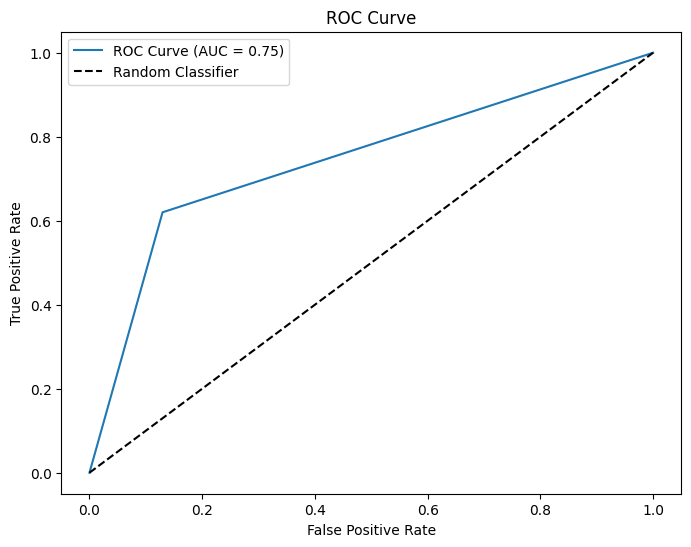

In [46]:
evaluate_model_performance(train, 'Y_Actual', 'Y_Logit_Pred')

          Predicted 0  Predicted 1
Actual 0         1320          177
Actual 1          177          326

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1497
           1       0.65      0.65      0.65       503

    accuracy                           0.82      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.82      0.82      0.82      2000

Accuracy: 0.823
Precision: 0.648
Recall: 0.648
F1 Score: 0.648
AUC: 0.765


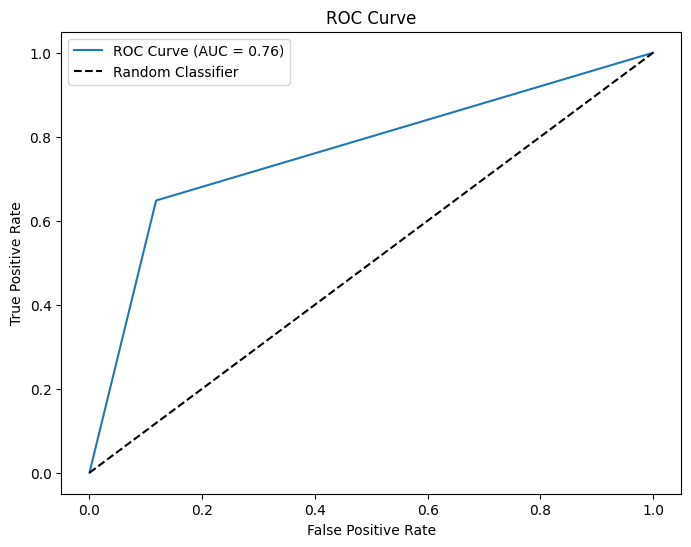

In [47]:
test['Y_Logit_Pred_Prob'] = model.predict(test)
test['Y_Logit_Pred'] = test['Y_Logit_Pred_Prob'] > 0.5
evaluate_model_performance(test, 'Y_Actual', 'Y_Logit_Pred')

In [48]:
model_2 = smf.logit("Y_Actual ~ Age + Gender",
                  data = train).fit()

Optimization terminated successfully.
         Current function value: 0.344287
         Iterations 9


In [49]:
print(model_2.summary())

                           Logit Regression Results                           
Dep. Variable:               Y_Actual   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7997
Method:                           MLE   Df Model:                            2
Date:                Sun, 02 Mar 2025   Pseudo R-squ.:                  0.3913
Time:                        17:25:12   Log-Likelihood:                -2754.3
converged:                       True   LL-Null:                       -4524.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.8038      0.353    -27.764      0.000     -10.496      -9.112
Age            0.0928      0.006     16.725      0.000       0.082       0.104
Gender         5.2004      0.197     26.395      0.0

          Predicted 0  Predicted 1
Actual 0         5189          787
Actual 1          756         1268

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5976
           1       0.62      0.63      0.62      2024

    accuracy                           0.81      8000
   macro avg       0.74      0.75      0.75      8000
weighted avg       0.81      0.81      0.81      8000

Accuracy: 0.807
Precision: 0.617
Recall: 0.626
F1 Score: 0.622
AUC: 0.747


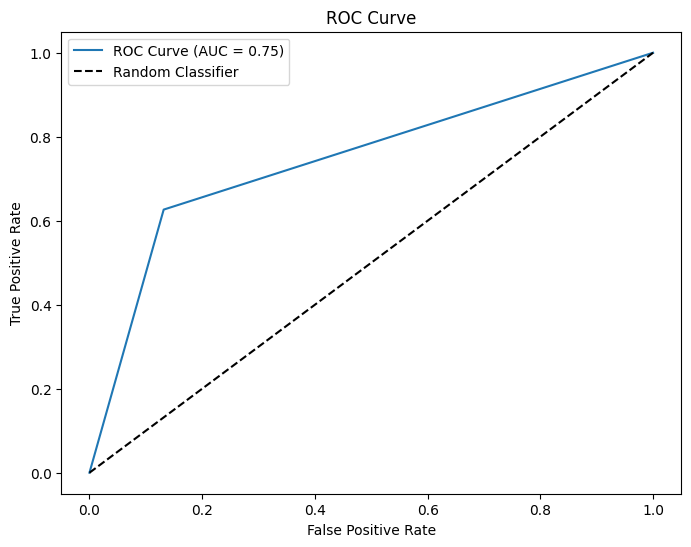

In [50]:
train['Y_Logit_Pred_2'] = model_2.predict(train) > 0.5
evaluate_model_performance(train, 'Y_Actual', 'Y_Logit_Pred_2')

          Predicted 0  Predicted 1
Actual 0         1314          183
Actual 1          172          331

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1497
           1       0.64      0.66      0.65       503

    accuracy                           0.82      2000
   macro avg       0.76      0.77      0.77      2000
weighted avg       0.82      0.82      0.82      2000

Accuracy: 0.823
Precision: 0.644
Recall: 0.658
F1 Score: 0.651
AUC: 0.768


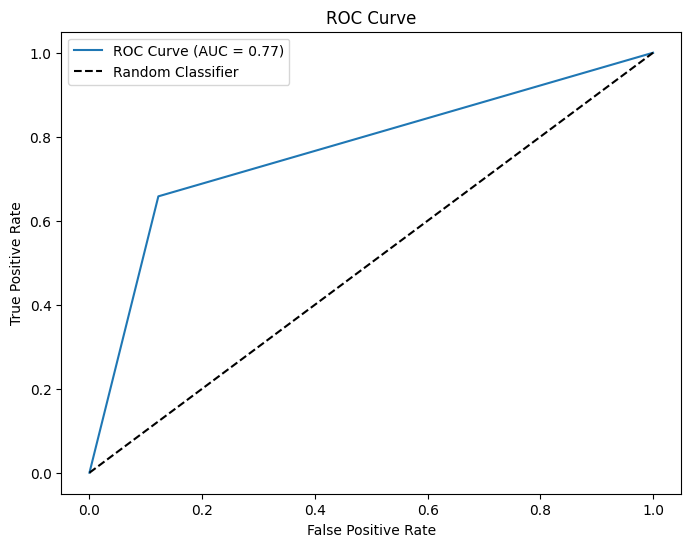

In [51]:
test['Y_Logit_Pred_2'] = model_2.predict(test) > 0.5
evaluate_model_performance(test, 'Y_Actual', 'Y_Logit_Pred_2')

Using Y_RN

In [52]:
model_rn = smf.logit("Y_Actual ~ Age + Gender + House_size + State + state_impact + spend + time_in_hours + Y_RN",
                  data = train).fit()
print(model_rn.summary())

Optimization terminated successfully.
         Current function value: 0.033918
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               Y_Actual   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Sun, 02 Mar 2025   Pseudo R-squ.:                  0.9400
Time:                        17:25:13   Log-Likelihood:                -271.34
converged:                       True   LL-Null:                       -4524.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -45.6743   6.81e+06   -6.7e-06      1.000   -1.34e+07    1.34e+07
State[T.FL]     -18

          Predicted 0  Predicted 1
Actual 0         5950           26
Actual 1           34         1990

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5976
           1       0.99      0.98      0.99      2024

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

Accuracy: 0.993
Precision: 0.987
Recall: 0.983
F1 Score: 0.985
AUC: 0.989


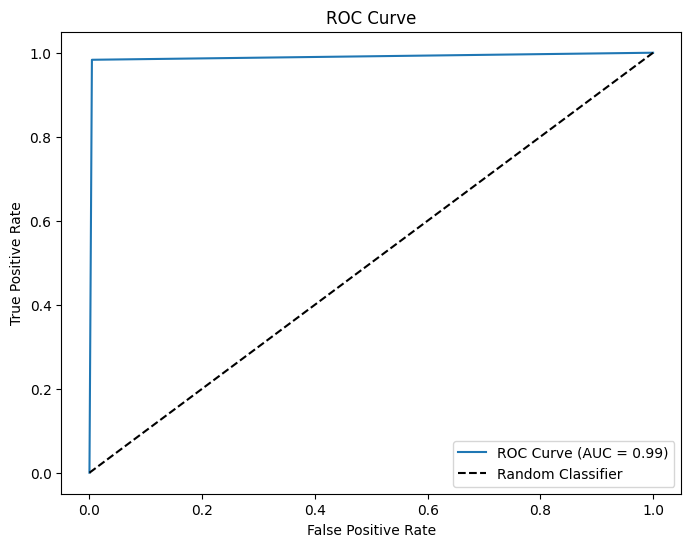

In [53]:
train['Y_Logit_Pred_RN_Prob'] = model_rn.predict(train)
train['Y_Logit_Pred_RN'] = train['Y_Logit_Pred_RN_Prob'] > 0.5
evaluate_model_performance(train, 'Y_Actual', 'Y_Logit_Pred_RN')

          Predicted 0  Predicted 1
Actual 0         1492            5
Actual 1           14          489

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1497
           1       0.99      0.97      0.98       503

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Accuracy: 0.991
Precision: 0.99
Recall: 0.972
F1 Score: 0.981
AUC: 0.984


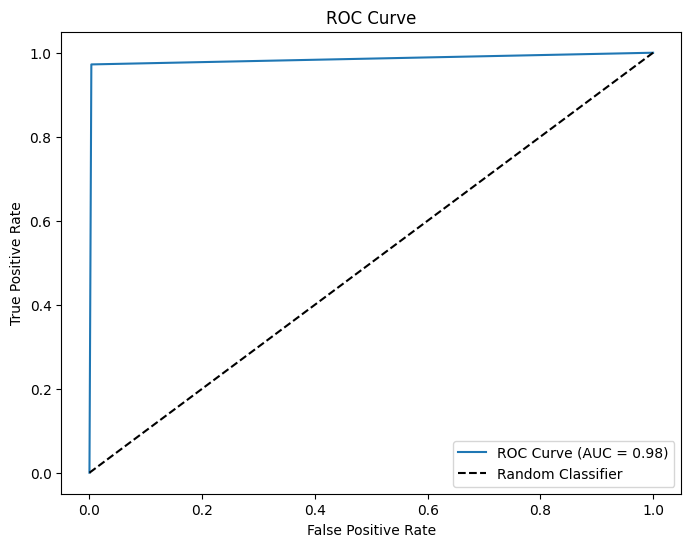

In [54]:
test['Y_Logit_Pred_RN'] = model_rn.predict(test) > 0.5
evaluate_model_performance(test, 'Y_Actual', 'Y_Logit_Pred_RN')

LDA

In [55]:
from sklearn.discriminant_analysis import *

# Initialize the LDA classifier
lda = LinearDiscriminantAnalysis()
train_x = train[['Age', 'Gender', 'House_size', 'state_impact', 'spend', 'time_in_hours']]
train_y = train['Y_Actual']
test_x = test[['Age', 'Gender', 'House_size', 'state_impact', 'spend', 'time_in_hours']]
test_y = test['Y_Actual']
# Train the classifier
lda.fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [56]:
lda.means_

array([[4.94928046e+01, 3.27811245e-01, 1.70030706e+03, 2.85073628e+00,
        4.95817478e-01, 2.95061117e+01],
       [5.14891304e+01, 9.86660079e-01, 1.70287253e+03, 2.85375494e+00,
        5.04845463e-01, 3.04063521e+01]])

In [57]:
lda.priors_

array([0.747, 0.253])

In [58]:
lda.scalings_

array([[ 5.41776800e-02],
       [ 2.41204685e+00],
       [-1.11219646e-05],
       [-5.03772407e-04],
       [ 5.15120116e-02],
       [ 9.76649162e-04]])

In [59]:
test['Y_LDA_Pred_Prob'] = lda.predict_proba(test_x)[:, 1]

          Predicted 0  Predicted 1
Actual 0         1249          248
Actual 1          121          382

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1497
           1       0.61      0.76      0.67       503

    accuracy                           0.82      2000
   macro avg       0.76      0.80      0.77      2000
weighted avg       0.83      0.82      0.82      2000

Accuracy: 0.816
Precision: 0.606
Recall: 0.759
F1 Score: 0.674
AUC: 0.797


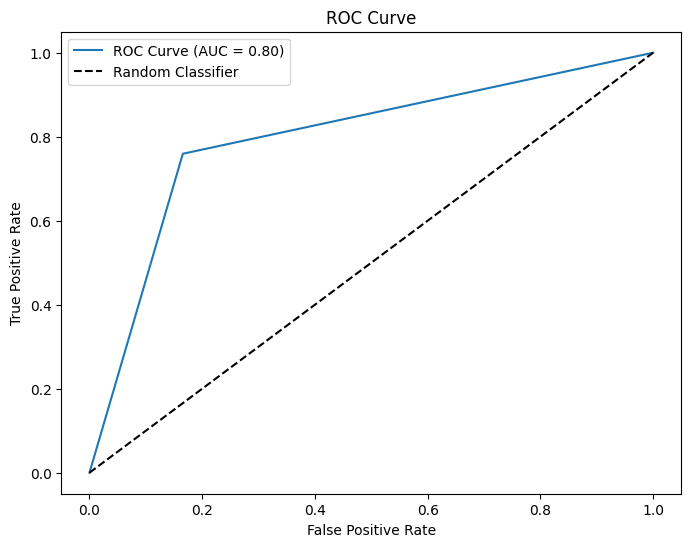

In [60]:
test['Y_LDA_Pred'] = test['Y_LDA_Pred_Prob'] > 0.5
evaluate_model_performance(test, 'Y_Actual', 'Y_LDA_Pred')

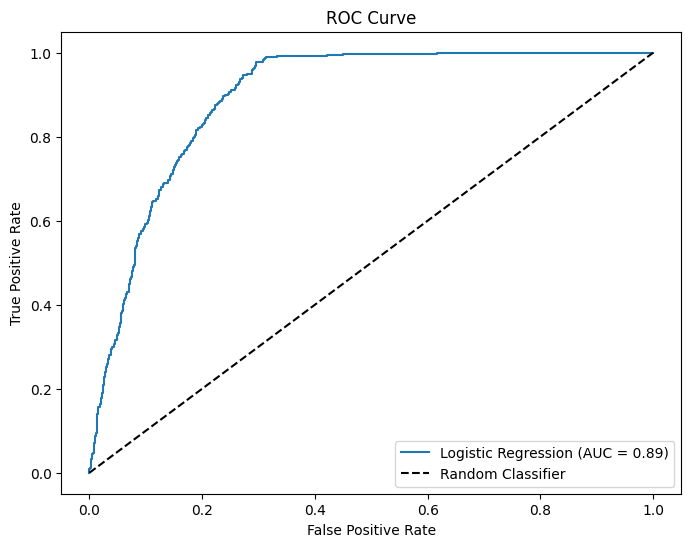

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(test['Y_Actual'], test['Y_Logit_Pred_Prob'])

# Calculate the AUC score
auc_score = roc_auc_score(test['Y_Actual'], test['Y_Logit_Pred_Prob'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

QDA

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [63]:
qda = QDA(store_covariance=True)
qda.fit(train_x, train_y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [64]:
qda.means_

array([[4.94928046e+01, 3.27811245e-01, 1.70030706e+03, 2.85073628e+00,
        4.95817478e-01, 2.95061117e+01],
       [5.14891304e+01, 9.86660079e-01, 1.70287253e+03, 2.85375494e+00,
        5.04845463e-01, 3.04063521e+01]])

In [65]:
qda.priors_

array([0.747, 0.253])

In [66]:
qda.covariance_[0]

array([[ 3.62563499e+01, -4.17473492e-01,  5.09535906e+01,
        -1.22245747e-01, -3.29184743e-02,  1.04790786e+00],
       [-4.17473492e-01,  2.20387911e-01,  4.32007805e+00,
         9.10587959e-03,  1.28425908e-03,  9.32701100e-02],
       [ 5.09535906e+01,  4.32007805e+00,  5.52408893e+05,
         1.77398994e+01, -2.40600393e+00, -1.01627000e+00],
       [-1.22245747e-01,  9.10587959e-03,  1.77398994e+01,
         3.97838607e+00, -3.14825395e-03,  3.27688414e-01],
       [-3.29184743e-02,  1.28425908e-03, -2.40600393e+00,
        -3.14825395e-03,  8.41173296e-02,  3.69838015e-02],
       [ 1.04790786e+00,  9.32701100e-02, -1.01627000e+00,
         3.27688414e-01,  3.69838015e-02,  3.04454207e+02]])

          Predicted 0  Predicted 1
Actual 0         1027          470
Actual 1            5          498

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.81      1497
           1       0.51      0.99      0.68       503

    accuracy                           0.76      2000
   macro avg       0.75      0.84      0.74      2000
weighted avg       0.87      0.76      0.78      2000

Accuracy: 0.762
Precision: 0.514
Recall: 0.99
F1 Score: 0.677
AUC: 0.838


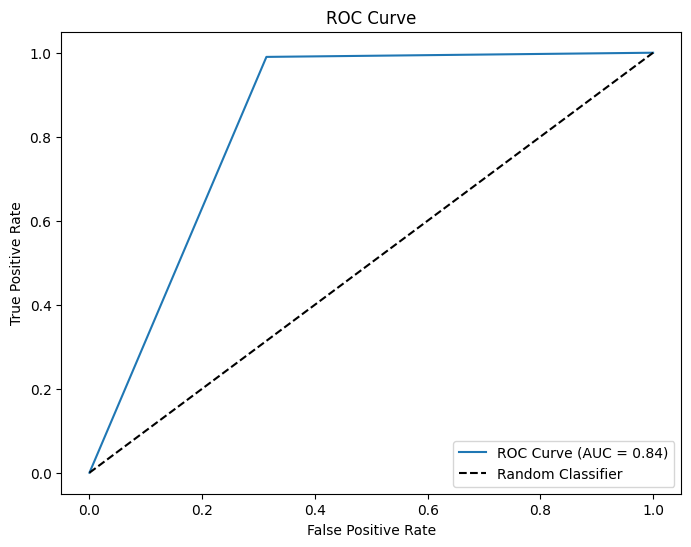

In [67]:
test['Y_QDA_Pred_Prob'] = qda.predict_proba(test_x)[:, 1]
test['Y_QDA_Pred'] = test['Y_QDA_Pred_Prob'] > 0.5
evaluate_model_performance(test, 'Y_Actual', 'Y_QDA_Pred')

Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(train_x, train_y)

GaussianNB()

In [69]:
NB.classes_

array([0, 1], dtype=int64)

In [70]:
NB.class_prior_

array([0.747, 0.253])

In [71]:
NB.theta_

array([[4.94928046e+01, 3.27811245e-01, 1.70030706e+03, 2.85073628e+00,
        4.95817478e-01, 2.95061117e+01],
       [5.14891304e+01, 9.86660079e-01, 1.70287253e+03, 2.85375494e+00,
        5.04845463e-01, 3.04063521e+01]])

In [72]:
train_x[train_y == 0].mean()

Age                49.492805
Gender              0.327811
House_size       1700.307062
state_impact        2.850736
spend               0.495817
time_in_hours      29.506112
dtype: float64

In [73]:
train_x[train_y == 1].mean()

Age                51.489130
Gender              0.986660
House_size       1702.872530
state_impact        2.853755
spend               0.504845
time_in_hours      30.406352
dtype: float64

          Predicted 0  Predicted 1
Actual 0         1027          470
Actual 1            5          498

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.81      1497
           1       0.51      0.99      0.68       503

    accuracy                           0.76      2000
   macro avg       0.75      0.84      0.74      2000
weighted avg       0.87      0.76      0.78      2000

Accuracy: 0.762
Precision: 0.514
Recall: 0.99
F1 Score: 0.677
AUC: 0.838


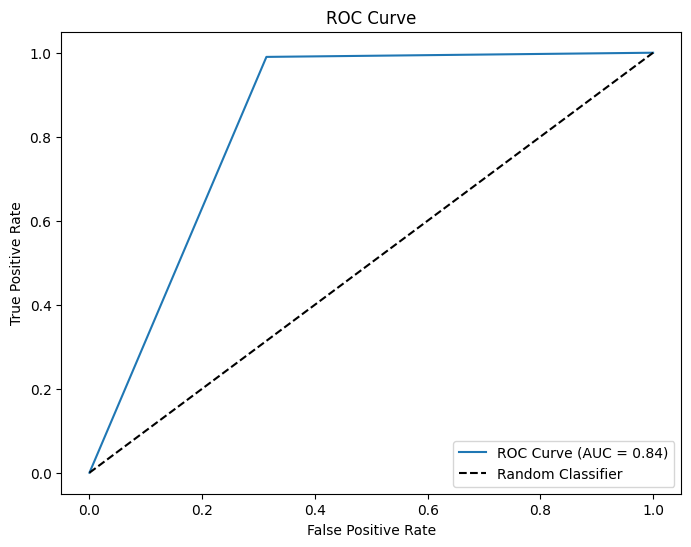

In [74]:
test['Y_NB_Pred_Prob'] = NB.predict_proba(test_x)[:,1]
test['Y_NB_Pred'] = test['Y_NB_Pred_Prob'] > 0.5
evaluate_model_performance(test, 'Y_Actual', 'Y_NB_Pred')

Pycaret

In [75]:
# import pycaret classification and init setup
from pycaret.classification import *

In [76]:
data.columns

Index(['Age', 'Gender', 'House_size', 'State', 'Time', 'Y_Actual',
       'state_impact', 'spend', 'Y_RN', 'time_in_hours', 'Y_Rule'],
      dtype='object')

In [77]:
model_data = data.drop(['Time', 'Y_RN', 'Y_Rule'], axis=1)

In [78]:
s = setup(data=model_data, 
         target='Y_Actual', 
         session_id=123, 
         train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Y_Actual
2,Target type,Binary
3,Original data shape,"(10000, 8)"
4,Transformed data shape,"(10000, 12)"
5,Transformed train set shape,"(8000, 12)"
6,Transformed test set shape,"(2000, 12)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [79]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8095,0.8809,0.6222,0.6237,0.6226,0.4953,0.4955,0.5540
ridge,Ridge Classifier,0.8086,0.8812,0.6316,0.6193,0.6251,0.4967,0.4970,0.0140
gbc,Gradient Boosting Classifier,0.8075,0.8786,0.5935,0.6258,0.6089,0.4814,0.4819,0.1730
ada,Ada Boost Classifier,0.8054,0.8764,0.5762,0.6253,0.5988,0.4708,0.4721,0.0630
lda,Linear Discriminant Analysis,0.8030,0.8812,0.7226,0.5905,0.6496,0.5146,0.5199,0.0180
lightgbm,Light Gradient Boosting Machine,0.7971,0.8736,0.5910,0.6004,0.5954,0.4601,0.4603,0.1770
rf,Random Forest Classifier,0.7885,0.8668,0.5549,0.5860,0.5698,0.4298,0.4302,0.1580
et,Extra Trees Classifier,0.7842,0.8643,0.5564,0.5758,0.5657,0.4223,0.4225,0.0930
dt,Decision Tree Classifier,0.7685,0.6941,0.5435,0.5420,0.5424,0.3876,0.3878,0.0200
nb,Naive Bayes,0.7519,0.8759,0.9871,0.5048,0.6680,0.5011,0.5733,0.0150


In [80]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8062,0.8804,0.6188,0.6158,0.6173,0.4876,0.4876
1,0.8125,0.8844,0.6832,0.6161,0.6479,0.5206,0.5219
2,0.8150,0.8892,0.6485,0.6298,0.6390,0.5147,0.5148
3,0.8038,0.8550,0.6089,0.6119,0.6104,0.4793,0.4793
4,0.7988,0.8682,0.6040,0.6010,0.6025,0.4677,0.4677
5,0.8175,0.8904,0.6089,0.6474,0.6276,0.5068,0.5073
6,0.8025,0.8802,0.6089,0.6089,0.6089,0.4768,0.4768
7,0.8125,0.8837,0.6089,0.6340,0.6212,0.4967,0.4969
8,0.8125,0.8921,0.6108,0.6359,0.6231,0.4984,0.4986


In [81]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [82]:
gbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7900,0.8778,0.6089,0.5802,0.5942,0.4527,0.4529
1,0.8075,0.8744,0.6188,0.6188,0.6188,0.4900,0.4900
2,0.7962,0.8782,0.6188,0.5924,0.6053,0.4681,0.4683
3,0.7912,0.8564,0.5891,0.5862,0.5877,0.4479,0.4479
4,0.7812,0.8672,0.5495,0.5692,0.5592,0.4138,0.4139
5,0.8062,0.8751,0.6040,0.6193,0.6115,0.4825,0.4826
6,0.7962,0.8806,0.5891,0.5980,0.5935,0.4576,0.4576
7,0.8025,0.8769,0.5743,0.6170,0.5949,0.4645,0.4650
8,0.7925,0.8757,0.5517,0.5989,0.5744,0.4375,0.4381


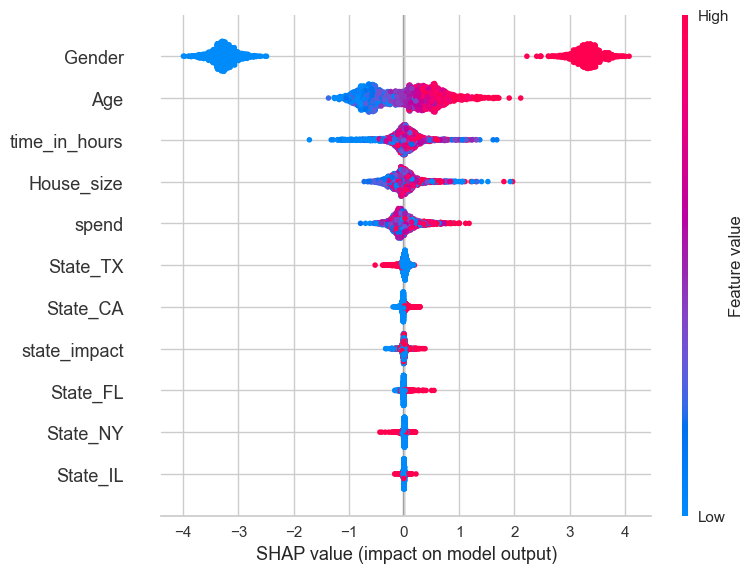

In [83]:
interpret_model(gbm)

In [84]:
tuned_lr = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8075,0.8810,0.6238,0.6176,0.6207,0.4917,0.4917
1,0.8088,0.8837,0.6782,0.6089,0.6417,0.5118,0.5132
2,0.8150,0.8893,0.6485,0.6298,0.6390,0.5147,0.5148
3,0.8025,0.8552,0.6089,0.6089,0.6089,0.4768,0.4768
4,0.7975,0.8692,0.6040,0.5980,0.6010,0.4653,0.4653
5,0.8188,0.8917,0.6139,0.6492,0.6310,0.5110,0.5114
6,0.8050,0.8805,0.6139,0.6139,0.6139,0.4834,0.4834
7,0.8175,0.8844,0.6386,0.6386,0.6386,0.5165,0.5165
8,0.8138,0.8922,0.6108,0.6392,0.6247,0.5009,0.5011


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [85]:
test_new = predict_model(tuned_lr, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8220,0.8958,0.6441,0.6467,0.6454,0.5266,0.5266


          Predicted 0  Predicted 1
Actual 0         1320          177
Actual 1          179          324

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1497
           1       0.65      0.64      0.65       503

    accuracy                           0.82      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.82      0.82      0.82      2000

Accuracy: 0.822
Precision: 0.647
Recall: 0.644
F1 Score: 0.645
AUC: 0.763


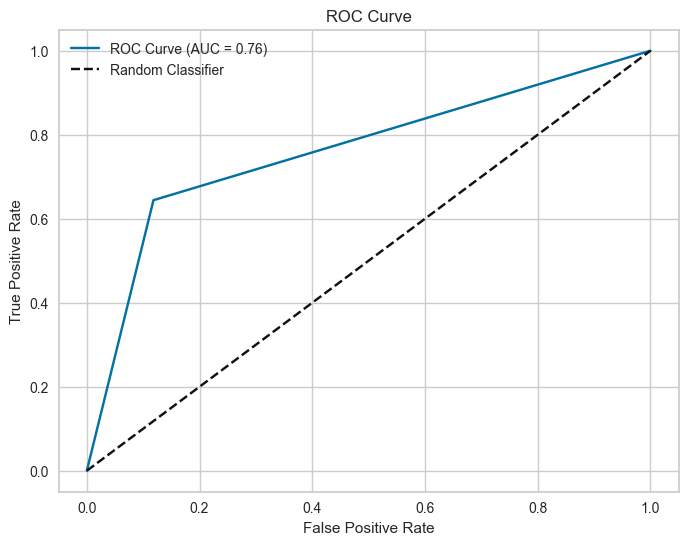

In [86]:
evaluate_model_performance(test_new, 'Y_Actual', 'prediction_label')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8079,0.8807,0.6191,0.6206,0.6198,0.4913,0.4913


          Predicted 0  Predicted 1
Actual 0         5210          766
Actual 1          771         1253

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5976
           1       0.62      0.62      0.62      2024

    accuracy                           0.81      8000
   macro avg       0.75      0.75      0.75      8000
weighted avg       0.81      0.81      0.81      8000

Accuracy: 0.808
Precision: 0.621
Recall: 0.619
F1 Score: 0.62
AUC: 0.745


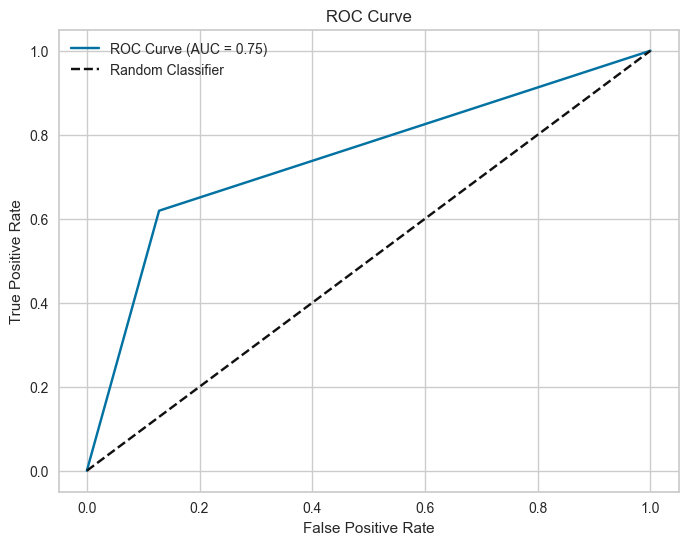

In [87]:
train_new = predict_model(tuned_lr, data=train)
evaluate_model_performance(train_new, 'Y_Actual', 'prediction_label')

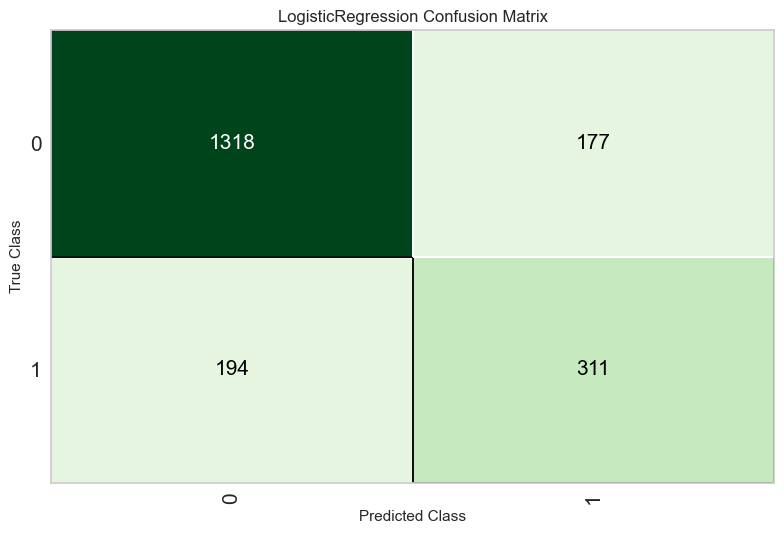

In [88]:
plot_model(tuned_lr, plot='confusion_matrix')

In [89]:
# Initialize PyCaret setup
s = setup(data=model_data, 
         target='Y_Actual', 
         session_id=123, 
         train_size=0.8,
         fold=5,
         n_jobs=-1)


,Description,Value
0,Session id,123
1,Target,Y_Actual
2,Target type,Binary
3,Original data shape,"(10000, 8)"
4,Transformed data shape,"(10000, 12)"
5,Transformed train set shape,"(8000, 12)"
6,Transformed test set shape,"(2000, 12)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [90]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8100,0.8833,0.6658,0.6142,0.6390,0.5103,0.5111
1,0.8100,0.8737,0.6238,0.6238,0.6238,0.4967,0.4967
2,0.8075,0.8814,0.6114,0.6206,0.6160,0.4875,0.4876
3,0.8094,0.8826,0.6198,0.6244,0.6221,0.4946,0.4946
4,0.8125,0.8882,0.6074,0.6357,0.6212,0.4967,0.4969
Mean,0.8099,0.8818,0.6256,0.6237,0.6244,0.4972,0.4974
Std,0.0016,0.0047,0.0209,0.0070,0.0077,0.0074,0.0077


In [91]:
tune_lr = tune_model(lr)
evaluation = pull()


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8094,0.8830,0.6559,0.6148,0.6347,0.5059,0.5064
1,0.8100,0.8722,0.6312,0.6220,0.6265,0.4991,0.4992
2,0.8069,0.8818,0.6089,0.6196,0.6142,0.4854,0.4855
3,0.8094,0.8826,0.6173,0.6250,0.6211,0.4938,0.4938
4,0.8119,0.8883,0.6099,0.6333,0.6214,0.4963,0.4964
Mean,0.8095,0.8816,0.6246,0.6230,0.6236,0.4961,0.4963
Std,0.0016,0.0052,0.0176,0.0062,0.0068,0.0067,0.0068


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [92]:
# Get the test dataset from the setup
test = get_config('X_test')
test['Y_Actual'] = get_config('y_test')


In [93]:
# Get the list of all models
all_models = models()

In [94]:
metric_df = pd.DataFrame()

def train_model(model_name):
    global metric_df
    # Create and tune the model
    print(f"{model_name} train data metrics:")
    model = create_model(model_name)

    print(f"Tuned {model_name} train data metrics:")
    tuned_model = tune_model(model)
    
    print(f"Best {model_name} test data metrics:")
    test_new = predict_model(tuned_model, data=test)
    metrics = pull()
    # Ensure metrics is a DataFrame
    if isinstance(metrics, pd.DataFrame):
        new_row = metrics
    else:
        new_row = pd.DataFrame([metrics])
    
    metric_df = pd.concat([metric_df, new_row], ignore_index=True)

In [95]:
train_model('lr')

lr train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8100,0.8833,0.6658,0.6142,0.6390,0.5103,0.5111
1,0.8100,0.8737,0.6238,0.6238,0.6238,0.4967,0.4967
2,0.8075,0.8814,0.6114,0.6206,0.6160,0.4875,0.4876
3,0.8094,0.8826,0.6198,0.6244,0.6221,0.4946,0.4946
4,0.8125,0.8882,0.6074,0.6357,0.6212,0.4967,0.4969
Mean,0.8099,0.8818,0.6256,0.6237,0.6244,0.4972,0.4974
Std,0.0016,0.0047,0.0209,0.0070,0.0077,0.0074,0.0077


Tuned lr train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8094,0.8830,0.6559,0.6148,0.6347,0.5059,0.5064
1,0.8100,0.8722,0.6312,0.6220,0.6265,0.4991,0.4992
2,0.8069,0.8818,0.6089,0.6196,0.6142,0.4854,0.4855
3,0.8094,0.8826,0.6173,0.6250,0.6211,0.4938,0.4938
4,0.8119,0.8883,0.6099,0.6333,0.6214,0.4963,0.4964
Mean,0.8095,0.8816,0.6246,0.6230,0.6236,0.4961,0.4963
Std,0.0016,0.0052,0.0176,0.0062,0.0068,0.0067,0.0068


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Best lr test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8155,0.8894,0.6198,0.6388,0.6291,0.5064,0.5065


In [96]:
train_model('knn')

knn train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6981,0.5201,0.1188,0.2743,0.1658,0.0155,0.0176
1,0.6994,0.5176,0.1262,0.2849,0.1750,0.0236,0.0265
2,0.6919,0.5048,0.1361,0.2764,0.1824,0.0189,0.0207
3,0.6956,0.5201,0.1210,0.2722,0.1675,0.0139,0.0156
4,0.6962,0.5153,0.1259,0.2787,0.1735,0.0189,0.0211
Mean,0.6962,0.5156,0.1256,0.2773,0.1728,0.0182,0.0203
Std,0.0026,0.0057,0.0060,0.0044,0.0059,0.0033,0.0037


Tuned knn train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7481,0.5351,0.0050,0.6667,0.0098,0.0061,0.0413
1,0.7488,0.5134,0.0074,0.7500,0.0147,0.0098,0.0573
2,0.7488,0.5012,0.0074,0.7500,0.0147,0.0098,0.0573
3,0.7462,0.5073,0.0025,0.3333,0.0049,0.0012,0.0080
4,0.7462,0.5169,0.0074,0.4286,0.0146,0.0060,0.0267
Mean,0.7476,0.5148,0.0059,0.5857,0.0117,0.0066,0.0381
Std,0.0011,0.0115,0.0020,0.1726,0.0039,0.0032,0.0189


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best knn test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7465,0.5273,0.0119,0.4286,0.0231,0.0096,0.0340


In [97]:
train_model('nb')

nb train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7519,0.8811,0.9876,0.5044,0.6678,0.5010,0.5734
1,0.7475,0.8621,0.9827,0.5000,0.6628,0.4931,0.5654
2,0.7462,0.8768,0.9901,0.4988,0.6633,0.4931,0.5682
3,0.7656,0.8783,0.9877,0.5195,0.6809,0.5224,0.5900
4,0.7481,0.8837,0.9877,0.5013,0.6650,0.4956,0.5692
Mean,0.7519,0.8764,0.9871,0.5048,0.6680,0.5011,0.5733
Std,0.0071,0.0075,0.0024,0.0076,0.0067,0.0111,0.0088


Tuned nb train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8038,0.8839,0.6931,0.5957,0.6407,0.5068,0.5095
1,0.8056,0.8680,0.6559,0.6064,0.6302,0.4986,0.4993
2,0.8062,0.8809,0.6584,0.6073,0.6318,0.5007,0.5014
3,0.8062,0.8812,0.6568,0.6087,0.6318,0.5006,0.5013
4,0.8081,0.8883,0.6494,0.6145,0.6315,0.5019,0.5022
Mean,0.8060,0.8805,0.6627,0.6065,0.6332,0.5017,0.5028
Std,0.0014,0.0068,0.0155,0.0061,0.0038,0.0027,0.0035


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best nb test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8180,0.8879,0.6634,0.6333,0.6480,0.5253,0.5256


In [98]:
train_model('dt')

dt train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7719,0.6941,0.5371,0.5494,0.5432,0.3912,0.3912
1,0.7556,0.6931,0.5668,0.5146,0.5395,0.3737,0.3745
2,0.7531,0.6742,0.5149,0.5111,0.5129,0.3476,0.3476
3,0.7781,0.7143,0.5852,0.5590,0.5718,0.4222,0.4224
4,0.7594,0.6724,0.4963,0.5262,0.5108,0.3514,0.3517
Mean,0.7636,0.6897,0.5401,0.5320,0.5356,0.3772,0.3775
Std,0.0097,0.0153,0.0326,0.0190,0.0224,0.0275,0.0275


Tuned dt train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8062,0.8720,0.5644,0.6298,0.5953,0.4684,0.4697
1,0.8081,0.8671,0.5495,0.6398,0.5912,0.4668,0.4691
2,0.8100,0.8738,0.5248,0.6543,0.5824,0.4614,0.4661
3,0.8100,0.8785,0.5802,0.6369,0.6072,0.4823,0.4832
4,0.8138,0.8810,0.5235,0.6688,0.5873,0.4693,0.4752
Mean,0.8096,0.8745,0.5485,0.6459,0.5927,0.4696,0.4726
Std,0.0025,0.0049,0.0221,0.0139,0.0084,0.0069,0.0060


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best dt test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8160,0.8834,0.5426,0.6667,0.5983,0.4806,0.4848


In [99]:
train_model('svm')

svm train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7475,0.5216,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.2525,0.5418,1.0000,0.2525,0.4032,0.0000,0.0000
2,0.2525,0.6118,1.0000,0.2525,0.4032,0.0000,0.0000
3,0.2531,0.5066,1.0000,0.2531,0.4040,0.0000,0.0000
4,0.7469,0.5161,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.4505,0.5396,0.6000,0.1516,0.2421,0.0000,0.0000
Std,0.2422,0.0379,0.4899,0.1238,0.1977,0.0000,0.0000


Tuned svm train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7581,0.8098,0.5347,0.5205,0.5275,0.3650,0.3650
1,0.7425,0.6937,0.4876,0.4900,0.4888,0.3167,0.3167
2,0.7575,0.7811,0.5371,0.5191,0.5280,0.3649,0.3650
3,0.7775,0.7944,0.5605,0.5605,0.5605,0.4115,0.4115
4,0.7544,0.7966,0.5259,0.5145,0.5201,0.3551,0.3552
Mean,0.7580,0.7751,0.5292,0.5209,0.5250,0.3627,0.3627
Std,0.0113,0.0417,0.0237,0.0226,0.0228,0.0302,0.0302


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best svm test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7490,0.6616,0.4851,0.5031,0.4940,0.3271,0.3272


In [100]:
train_model('ridge')

ridge train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8069,0.8835,0.6609,0.6082,0.6335,0.5027,0.5035
1,0.8069,0.8728,0.6386,0.6128,0.6255,0.4954,0.4956
2,0.8050,0.8814,0.6163,0.6133,0.6148,0.4843,0.4843
3,0.8100,0.8827,0.6198,0.6259,0.6228,0.4958,0.4959
4,0.8106,0.8878,0.6148,0.6288,0.6217,0.4954,0.4955
Mean,0.8079,0.8816,0.6301,0.6178,0.6237,0.4947,0.4949
Std,0.0021,0.0049,0.0176,0.0081,0.0060,0.0059,0.0061


Tuned ridge train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8088,0.8835,0.6609,0.6124,0.6357,0.5063,0.5070
1,0.8056,0.8727,0.6312,0.6115,0.6212,0.4905,0.4906
2,0.8075,0.8814,0.6163,0.6194,0.6179,0.4892,0.4892
3,0.8094,0.8827,0.6148,0.6256,0.6202,0.4929,0.4930
4,0.8112,0.8879,0.6123,0.6310,0.6216,0.4959,0.4960
Mean,0.8085,0.8816,0.6271,0.6200,0.6233,0.4950,0.4952
Std,0.0019,0.0050,0.0181,0.0075,0.0063,0.0061,0.0063


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best ridge test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8140,0.7490,0.6178,0.6354,0.6265,0.5027,0.5028


In [101]:
train_model('rf')

rf train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7969,0.8736,0.5842,0.6005,0.5922,0.4570,0.4571
1,0.7969,0.8645,0.6064,0.5961,0.6012,0.4650,0.4650
2,0.7837,0.8635,0.5470,0.5755,0.5609,0.4176,0.4178
3,0.7856,0.8642,0.5630,0.5787,0.5707,0.4279,0.4280
4,0.8056,0.8737,0.6025,0.6193,0.6108,0.4813,0.4813
Mean,0.7938,0.8679,0.5806,0.5940,0.5872,0.4497,0.4498
Std,0.0081,0.0047,0.0228,0.0159,0.0187,0.0236,0.0236


Tuned rf train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8038,0.8764,0.6980,0.5949,0.6424,0.5083,0.5114
1,0.7975,0.8687,0.6262,0.5939,0.6096,0.4731,0.4734
2,0.8075,0.8750,0.5272,0.6455,0.5804,0.4571,0.4611
3,0.8075,0.8821,0.6198,0.6198,0.6198,0.4909,0.4909
4,0.8144,0.8884,0.4716,0.6971,0.5626,0.4503,0.4641
Mean,0.8061,0.8781,0.5886,0.6302,0.6029,0.4759,0.4802
Std,0.0055,0.0067,0.0798,0.0384,0.0284,0.0214,0.0188


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best rf test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8065,0.8797,0.6812,0.6035,0.6400,0.5084,0.5101


In [102]:
train_model('qda')

qda train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4469,0.6070,0.9579,0.3084,0.4665,0.1368,0.2453
1,0.7512,0.6985,0.1856,0.5208,0.2737,0.1626,0.1942
2,0.4975,0.6061,0.7624,0.3031,0.4338,0.1135,0.1538
3,0.4706,0.6231,0.9210,0.3140,0.4683,0.1458,0.2376
4,0.7556,0.7479,0.1679,0.5574,0.2581,0.1596,0.2010
Mean,0.5844,0.6565,0.5990,0.4007,0.3801,0.1436,0.2064
Std,0.1390,0.0569,0.3510,0.1136,0.0942,0.0177,0.0330


Tuned qda train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8100,0.8828,0.5866,0.6337,0.6093,0.4840,0.4846
1,0.8038,0.8720,0.5569,0.6250,0.5890,0.4607,0.4620
2,0.8062,0.8814,0.5248,0.6424,0.5777,0.4536,0.4575
3,0.8088,0.8813,0.5407,0.6460,0.5887,0.4654,0.4685
4,0.8162,0.8884,0.5481,0.6667,0.6016,0.4837,0.4876
Mean,0.8090,0.8812,0.5514,0.6428,0.5933,0.4695,0.4720
Std,0.0042,0.0053,0.0205,0.0140,0.0110,0.0123,0.0120


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best qda test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8125,0.8877,0.5386,0.6570,0.5919,0.4718,0.4757


In [103]:
train_model('ada')

ada train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8012,0.8637,0.6188,0.6039,0.6112,0.4778,0.4778
1,0.8031,0.8711,0.5718,0.6193,0.5946,0.4649,0.4655
2,0.8069,0.8744,0.5792,0.6273,0.6023,0.4751,0.4757
3,0.8069,0.8782,0.6074,0.6212,0.6142,0.4855,0.4855
4,0.8012,0.8807,0.5457,0.6225,0.5816,0.4520,0.4537
Mean,0.8039,0.8736,0.5846,0.6189,0.6008,0.4710,0.4716
Std,0.0025,0.0060,0.0261,0.0080,0.0118,0.0116,0.0110


Tuned ada train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8062,0.8731,0.5644,0.6298,0.5953,0.4684,0.4697
1,0.8081,0.8672,0.5495,0.6398,0.5912,0.4668,0.4691
2,0.8100,0.8750,0.5248,0.6543,0.5824,0.4614,0.4661
3,0.8100,0.8754,0.5802,0.6369,0.6072,0.4823,0.4832
4,0.8150,0.8782,0.5728,0.6535,0.6105,0.4899,0.4917
Mean,0.8099,0.8738,0.5583,0.6429,0.5973,0.4738,0.4759
Std,0.0029,0.0037,0.0197,0.0096,0.0104,0.0106,0.0099


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best ada test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8160,0.8817,0.5426,0.6667,0.5983,0.4806,0.4848


In [104]:
train_model('gbc')

gbc train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8088,0.8788,0.6114,0.6237,0.6175,0.4900,0.4901
1,0.8081,0.8712,0.6040,0.6240,0.6138,0.4862,0.4863
2,0.8056,0.8791,0.5842,0.6227,0.6028,0.4743,0.4747
3,0.8025,0.8798,0.5877,0.6150,0.6010,0.4699,0.4701
4,0.8056,0.8796,0.5457,0.6351,0.5870,0.4608,0.4631
Mean,0.8061,0.8777,0.5866,0.6241,0.6044,0.4763,0.4769
Std,0.0022,0.0033,0.0228,0.0064,0.0108,0.0107,0.0100


Tuned gbc train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8031,0.8778,0.4332,0.6705,0.5263,0.4092,0.4248
1,0.7988,0.8756,0.3837,0.6798,0.4905,0.3770,0.4010
2,0.7881,0.8788,0.3267,0.6633,0.4378,0.3254,0.3564
3,0.7869,0.8835,0.3531,0.6441,0.4561,0.3374,0.3610
4,0.8038,0.8847,0.3802,0.7097,0.4952,0.3869,0.4159
Mean,0.7961,0.8801,0.3754,0.6735,0.4812,0.3672,0.3918
Std,0.0073,0.0034,0.0355,0.0216,0.0311,0.0313,0.0281


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Best gbc test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8130,0.8820,0.5842,0.6427,0.6120,0.4892,0.4902


In [105]:
train_model('lda')

lda train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8006,0.8835,0.7525,0.5813,0.6559,0.5188,0.5273
1,0.8025,0.8728,0.7401,0.5863,0.6543,0.5186,0.5255
2,0.7931,0.8814,0.6931,0.5749,0.6285,0.4869,0.4910
3,0.8044,0.8827,0.7062,0.5958,0.6463,0.5125,0.5160
4,0.8119,0.8878,0.7259,0.6074,0.6614,0.5326,0.5366
Mean,0.8025,0.8816,0.7235,0.5892,0.6493,0.5139,0.5193
Std,0.0060,0.0049,0.0217,0.0114,0.0115,0.0150,0.0156


Tuned lda train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8006,0.8835,0.7525,0.5813,0.6559,0.5188,0.5273
1,0.8025,0.8728,0.7401,0.5863,0.6543,0.5186,0.5255
2,0.7931,0.8814,0.6931,0.5749,0.6285,0.4869,0.4910
3,0.8044,0.8827,0.7062,0.5958,0.6463,0.5125,0.5160
4,0.8119,0.8878,0.7259,0.6074,0.6614,0.5326,0.5366
Mean,0.8025,0.8816,0.7235,0.5892,0.6493,0.5139,0.5193
Std,0.0060,0.0049,0.0217,0.0114,0.0115,0.0150,0.0156


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Best lda test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8045,0.8897,0.7248,0.5922,0.6518,0.5178,0.5229


In [106]:
train_model('et')

et train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7975,0.8745,0.5866,0.6015,0.5940,0.4591,0.4592
1,0.7894,0.8604,0.5767,0.5840,0.5803,0.4397,0.4398
2,0.7869,0.8615,0.5446,0.5836,0.5634,0.4226,0.4231
3,0.7794,0.8643,0.5556,0.5653,0.5604,0.4131,0.4132
4,0.7856,0.8690,0.5852,0.5752,0.5802,0.4362,0.4363
Mean,0.7878,0.8660,0.5697,0.5819,0.5757,0.4342,0.4343
Std,0.0059,0.0052,0.0168,0.0119,0.0123,0.0157,0.0157


Tuned et train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8069,0.8842,0.6114,0.6190,0.6152,0.4863,0.4863
1,0.8088,0.8747,0.5916,0.6289,0.6097,0.4832,0.4836
2,0.8100,0.8814,0.5817,0.6351,0.6072,0.4822,0.4831
3,0.8100,0.8798,0.5827,0.6361,0.6082,0.4832,0.4840
4,0.8144,0.8862,0.5728,0.6517,0.6097,0.4886,0.4904
Mean,0.8100,0.8813,0.5880,0.6342,0.6100,0.4847,0.4855
Std,0.0025,0.0039,0.0131,0.0107,0.0028,0.0024,0.0027


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best et test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8135,0.8866,0.5822,0.6447,0.6119,0.4895,0.4906


In [107]:
train_model('lightgbm')

lightgbm train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8031,0.8776,0.6337,0.6052,0.6191,0.4865,0.4867
1,0.7869,0.8625,0.6114,0.5731,0.5916,0.4476,0.4481
2,0.7881,0.8662,0.5594,0.5840,0.5714,0.4308,0.4310
3,0.7962,0.8726,0.5704,0.6031,0.5863,0.4513,0.4516
4,0.7931,0.8747,0.5704,0.5954,0.5826,0.4452,0.4453
Mean,0.7935,0.8707,0.5890,0.5922,0.5902,0.4523,0.4525
Std,0.0059,0.0056,0.0285,0.0121,0.0159,0.0185,0.0185


Tuned lightgbm train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8044,0.8783,0.6337,0.6081,0.6206,0.4889,0.4891
1,0.7944,0.8717,0.5990,0.5917,0.5953,0.4575,0.4575
2,0.7981,0.8728,0.5817,0.6041,0.5927,0.4586,0.4587
3,0.8006,0.8780,0.5901,0.6097,0.5997,0.4670,0.4672
4,0.8050,0.8781,0.5926,0.6202,0.6061,0.4766,0.4768
Mean,0.8005,0.8758,0.5994,0.6067,0.6029,0.4697,0.4699
Std,0.0040,0.0029,0.0180,0.0092,0.0100,0.0118,0.0118


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best lightgbm test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8010,0.8782,0.5901,0.6094,0.5996,0.4672,0.4673


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [108]:
train_model('dummy')

dummy train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7475,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7475,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7475,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7469,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7469,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.7472,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Tuned dummy train data metrics:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7475,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7475,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7475,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7469,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7469,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.7472,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Best dummy test data metrics:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.7475,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [109]:
print(metric_df.sort_values('AUC', ascending=False))

                              Model  Accuracy     AUC  Recall   Prec.      F1  \
10     Linear Discriminant Analysis    0.8045  0.8897  0.7248  0.5922  0.6518   
0               Logistic Regression    0.8155  0.8894  0.6198  0.6388  0.6291   
2                       Naive Bayes    0.8180  0.8879  0.6634  0.6333  0.6480   
7   Quadratic Discriminant Analysis    0.8125  0.8877  0.5386  0.6570  0.5919   
11           Extra Trees Classifier    0.8135  0.8866  0.5822  0.6447  0.6119   
3          Decision Tree Classifier    0.8160  0.8834  0.5426  0.6667  0.5983   
9      Gradient Boosting Classifier    0.8130  0.8820  0.5842  0.6427  0.6120   
8              Ada Boost Classifier    0.8160  0.8817  0.5426  0.6667  0.5983   
6          Random Forest Classifier    0.8065  0.8797  0.6812  0.6035  0.6400   
12  Light Gradient Boosting Machine    0.8010  0.8782  0.5901  0.6094  0.5996   
5                  Ridge Classifier    0.8140  0.7490  0.6178  0.6354  0.6265   
4               SVM - Linear

In [110]:
lda = create_model('lda')
lda_tune = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8006,0.8835,0.7525,0.5813,0.6559,0.5188,0.5273
1,0.8025,0.8728,0.7401,0.5863,0.6543,0.5186,0.5255
2,0.7931,0.8814,0.6931,0.5749,0.6285,0.4869,0.4910
3,0.8044,0.8827,0.7062,0.5958,0.6463,0.5125,0.5160
4,0.8119,0.8878,0.7259,0.6074,0.6614,0.5326,0.5366
Mean,0.8025,0.8816,0.7235,0.5892,0.6493,0.5139,0.5193
Std,0.0060,0.0049,0.0217,0.0114,0.0115,0.0150,0.0156


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8006,0.8835,0.7525,0.5813,0.6559,0.5188,0.5273
1,0.8025,0.8728,0.7401,0.5863,0.6543,0.5186,0.5255
2,0.7931,0.8814,0.6931,0.5749,0.6285,0.4869,0.4910
3,0.8044,0.8827,0.7062,0.5958,0.6463,0.5125,0.5160
4,0.8119,0.8878,0.7259,0.6074,0.6614,0.5326,0.5366
Mean,0.8025,0.8816,0.7235,0.5892,0.6493,0.5139,0.5193
Std,0.0060,0.0049,0.0217,0.0114,0.0115,0.0150,0.0156


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [111]:
evaluate_model(lda_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…